<a href="https://colab.research.google.com/github/karanm21/IITG_Research_Intern/blob/main/DEMO_MITDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wfdb

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath
import pandas as pd
import wfdb

In [ ]:
import os
wfdb.dl_database('mitdb', os.path.join(os.getcwd(), 'mitdb'))

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

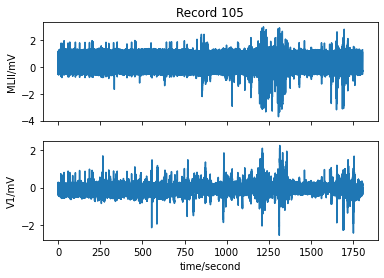

{'record_name': '105',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 650000,
 'base_time': None,
 'base_date': None,
 'comments': ['73 F 1624 1629 x1',
  'Digoxin, Nitropaste, Pronestyl',
  'The PVCs are uniform.  The predominant feature of this tape is',
  'high-grade noise and artifact.'],
 'sig_name': ['MLII', 'V1'],
 'p_signal': array([[-0.445,  0.26 ],
        [-0.445,  0.26 ],
        [-0.445,  0.26 ],
        ...,
        [ 0.59 , -0.37 ],
        [ 0.76 , -0.38 ],
        [ 1.28 ,  0.   ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['105.dat', '105.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [935, 1076],
 'checksum': [-24679, -15565],
 'block_size': [0, 0]}

In [ ]:
record = wfdb.rdrecord('mitdb/105')
wfdb.plot_wfdb(record=record, title='Record 105')
display(record.__dict__)

In [ ]:
signals, fields = wfdb.rdsamp('mitdb/105', sampfrom=100, sampto=15000)
display(signals)
display(fields)

array([[-0.345,  0.13 ],
       [-0.33 ,  0.15 ],
       [-0.335,  0.155],
       ...,
       [-0.07 , -0.02 ],
       [-0.06 , -0.02 ],
       [-0.06 , -0.02 ]])

{'fs': 360,
 'sig_len': 14900,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['MLII', 'V1'],
 'comments': ['73 F 1624 1629 x1',
  'Digoxin, Nitropaste, Pronestyl',
  'The PVCs are uniform.  The predominant feature of this tape is',
  'high-grade noise and artifact.']}

In [ ]:
# Demo 3 - Read a WFDB header file only (without the signals)
record = wfdb.rdheader('mitdb/105')
display(record.__dict__)

{'record_name': '105',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 650000,
 'base_time': None,
 'base_date': None,
 'comments': ['73 F 1624 1629 x1',
  'Digoxin, Nitropaste, Pronestyl',
  'The PVCs are uniform.  The predominant feature of this tape is',
  'high-grade noise and artifact.'],
 'sig_name': ['MLII', 'V1'],
 'p_signal': None,
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['105.dat', '105.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [935, 1076],
 'checksum': [-24679, -15565],
 'block_size': [0, 0]}

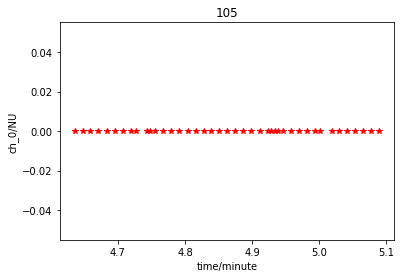

In [ ]:
annotation = wfdb.rdann('mitdb/105', 'atr', sampfrom=100000, sampto=110000)
annotation.fs = 360
wfdb.plot_wfdb(annotation=annotation, time_units='minutes')

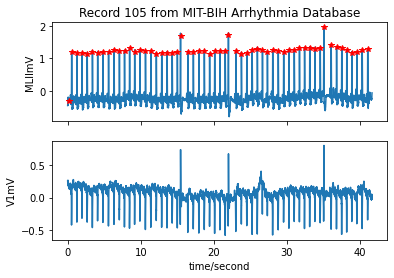

In [ ]:
# Demo 5 - Read a WFDB record and annotation. Plot all channels, and the annotation on top of channel 0.
record = wfdb.rdrecord('mitdb/105', sampto = 15000)
annotation = wfdb.rdann('mitdb/105', 'atr', sampto = 15000)

wfdb.plot_wfdb(record=record, annotation=annotation, title='Record 105 from MIT-BIH Arrhythmia Database', time_units='seconds')

In [ ]:
from wfdb import processing
import numpy as np
import pandas as pd
import pywt
import sys
from scipy import signal
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 15]
from sklearn import svm
# from sklearn_rvm import EMRVC
# from skrvm import RVC
from scipy.signal import find_peaks
from scipy.signal import decimate
from sklearn.decomposition import PCA

In [ ]:
## Doubt:

ann = wfdb.rdann('mitdb/105', 'atr')
samples = ann.sample
print(samples[1:20])
samples[1]

[ 197  459  708  965 1222 1479 1741 2015 2287 2550 2803 3052 3303 3563
 3835 4102 4371 4635 4901]


197

In [ ]:
def startFunc(signalString):
    signals, fields = wfdb.rdsamp(signalString)
    signals = signals[:,0]
    signals = np.array(signals, dtype=[('O', float)]).astype(float)
    signals = (signals - np.mean(signals))/(np.std(signals))
    ann = wfdb.rdann(signalString, 'atr')
    samples = ann.sample
    symbols = ann.aux_note
    symbols = list(map(lambda x: x[1:-1], symbols))

    points = []
    pointSym = []

    for i in range(len(samples)):
        if(symbols[i] == 'VFL' or symbols[i] == 'VFIB' or symbols[i] == 'VF' or symbols[i] == 'VT'):
            points.append(samples[i])
            pointSym.append(symbols[i])

    return points, pointSym, signals, samples

In [ ]:
startFunc('mitdb/200')

([39210, 226766, 340338, 385419, 396038, 408085, 537912],
 ['VT', 'VT', 'VT', 'VT', 'VT', 'VT', 'VT'],
 array([1.19800971, 1.19800971, 1.19800971, ..., 0.31671207, 0.31671207,
        0.27725098]),
 array([    67,    225,    487, ..., 649408, 649664, 649927]))

In [ ]:
def startFuncMIT(signalString):

    '''
    This function scans the record using the WFDB package. It generates the signal voltages, sample points of annotated R peaks,
    corresponding symbols and resamples the signal from 360 to 250Hz. The points which correspond to a Ventricular Arrhythmia
    type abnormality

    '''
    signals, fields = wfdb.rdsamp(signalString)
    signals = signals[:,0]
    signals = np.array(signals, dtype=[('O', float)]).astype(float)
    signals = (signals - np.mean(signals))/(np.std(signals))
    ann = wfdb.rdann(signalString, 'atr')

    signals, ann = wfdb.processing.resample_singlechan(signals, ann, 360, 250)
    samples = ann.sample
    symbols = ann.symbol

    points = []
    pointSym = []

    for i in range(len(samples)):
        if(symbols[i] == 'V' or symbols[i] == 'F' or symbols[i] == 'E' or symbols[i] == '!'):
            points.append(samples[i])
            pointSym.append(symbols[i])

    return points, pointSym, signals, samples

In [ ]:
startFuncMIT('mitdb/105')

([3861,
  5501,
  8767,
  14723,
  17251,
  25550,
  31779,
  39801,
  46435,
  50336,
  51596,
  70912,
  75018,
  82182,
  87577,
  102047,
  108891,
  113721,
  115170,
  120786,
  137727,
  160597,
  165337,
  168041,
  176683,
  187169,
  205930,
  216376,
  257898,
  296579,
  301659,
  317133,
  321968,
  338986,
  340454,
  365252,
  394892,
  402638,
  422818,
  428834,
  429954],
 ['V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V',
  'V'],
 array([ 0.23307287, -0.81509589, -0.38039838, ...,  1.56223502,
         1.83906107,  3.3654597 ]),
 array([    46,    136,    318, ..., 450847, 451021, 451208]))

In [ ]:
def getFeatures(Ppos,Tpos,A,B,rpeaks,start,end):

    '''
    From the boundary points generated, this function extracts the 8 intermmediate features from which the final
    24 element feature set will be derived.

    '''
    RR = np.array([])
    PQ = np.array([])
    QP = np.array([])
    RT = np.array([])
    PS = np.array([])
    QRS = np.array([])
    QT = np.array([])
    ICEB = np.array([])
    QTC = np.array([])

    ts = 1/250

    for i in range(len(rpeaks)):
        index = rpeaks[i]
        if(index > 0 and index >= start and index <= end):
            RR = np.append(RR, (rpeaks[i] - rpeaks[i - 1])*ts)
            PQ = np.append(PQ, (A[i - 1] - Ppos[i - 1])*ts)
            QP = np.append(QP, (Ppos[i] - A[i - 1])*ts)
            RT = np.append(RT, (Tpos[i - 1] - rpeaks[i - 1])*ts)
            QT = np.append(QT, (Tpos[i - 1] - A[i - 1])*ts)
            PS = np.append(PS, (B[i - 1] - Ppos[i - 1])*ts)
            QRS = np.append(QRS, (B[i] - A[i])*ts)

    for i in range(len(QT)):
        ICEB = np.append(ICEB, QT[i]/QRS[i])
        QTC = np.append(QTC, QT[i]/RR[i])

    return RR,PQ,QP,RT,PS,QRS,ICEB,QTC

In [ ]:
pip install neurokit2

In [ ]:
pip install biosppy

In [ ]:
import neurokit2 as nk
import biosppy
from statistics import mean

In [ ]:
def generateIntervals2(signalString,param,fs,dbType, split):

    '''
    This function extracts the required features firstly via Neurokit package and then extracts the final set of 24 features.
    '''
    points, pointSym, signals, samples = startFuncMIT(signalString)
    cleaned = nk.ecg_clean(signals, sampling_rate = 250)
    rdet, = biosppy.signals.ecg.hamilton_segmenter(signal = cleaned, sampling_rate = 250)
    rdet, = biosppy.signals.ecg.correct_rpeaks(signal = cleaned, rpeaks = rdet, sampling_rate = 250, tol = 0.05)

    rdet = np.delete(rdet, -1)       # remove the last R-peak to avoid the invalid detection for S and T peaks.
    rdet = np.delete(rdet, 0)        # remove the first R-peak to avoid the invalid detection for P and Q peaks.
    rpeaks = {'ECG_R_Peaks': rdet}
    cleaned_base = nk.signal_detrend(cleaned, order=0)
    signals, waves = nk.ecg_delineate(cleaned_base, rpeaks, sampling_rate = 250, method = "dwt")

    Toff = waves['ECG_T_Offsets']
    Pon = waves['ECG_P_Onsets']
    R = rdet
    Q = waves['ECG_Q_Peaks']
    S = waves['ECG_S_Peaks']

    nanindices = []
    Ppos = []
    Tpos = []
    A = []
    B = []
    rpeaks = []

    for some2 in range(len(R)):
        if(np.isnan(Toff[some2]) or np.isnan(Pon[some2]) or np.isnan(Q[some2]) or np.isnan(S[some2]) or np.isnan(R[some2])):
            nanindices.append(some2)
        else:
            rpeaks.append(R[some2])
            Ppos.append(Pon[some2])
            Tpos.append(Toff[some2])
            A.append(Q[some2])
            B.append(S[some2])

    print(len(rpeaks))
    print(len(Tpos))
    print(len(Ppos))
    print(len(A))
    print(len(B))

    offset = param*60*fs
    normalsets = []
    arrysets = []
    RRmean = np.array([])
    RRstd = np.array([])
    RRvar = np.array([])

    QPmean = np.array([])
    QPstd = np.array([])
    QPvar = np.array([])

    PQmean = np.array([])
    PQstd = np.array([])
    PQvar = np.array([])

    RTmean = np.array([])
    RTstd = np.array([])
    RTvar = np.array([])

    PSmean = np.array([])
    PSstd = np.array([])
    PSvar = np.array([])

    QRSmean = np.array([])
    QRSstd = np.array([])
    QRSvar = np.array([])

    ICEBmean = np.array([])
    ICEBstd = np.array([])
    ICEBvar = np.array([])

    QTCmean = np.array([])
    QTCstd = np.array([])
    QTCvar = np.array([])

    y_train = np.array([])

    if(len(points) == 0):
        a = 0
        b = len(signals)
        d = split*fs

        for i in range(a,b,d):
            temp = []
            if((i + d) < b):
                RR,PQ,QP,RT,PS,QRS,ICEB,QTC = getFeatures(Ppos,Tpos,A,B,rpeaks,i,i + d)
                RRmean = np.append(RRmean, np.mean(RR))
                PQmean = np.append(PQmean, np.mean(PQ))
                QPmean = np.append(QPmean, np.mean(QP))
                RTmean = np.append(RTmean, np.mean(RT))
                PSmean = np.append(PSmean, np.mean(PS))
                QRSmean = np.append(QRSmean, np.mean(QRS))
                ICEBmean = np.append(ICEBmean, np.mean(ICEB))
                QTCmean = np.append(QTCmean, np.mean(QTC))

                RRvar = np.append(RRvar, np.var(RR))
                PQvar = np.append(PQvar, np.var(PQ))
                QPvar = np.append(QPvar, np.var(QP))
                RTvar = np.append(RTvar, np.var(RT))
                PSvar = np.append(PSvar, np.var(PS))
                QRSvar = np.append(QRSvar, np.var(QRS))
                ICEBvar = np.append(ICEBvar, np.var(ICEB))
                QTCvar = np.append(QTCvar, np.var(QTC))

                RRstd = np.append(RRstd, np.std(RR))
                PQstd = np.append(PQstd, np.std(PQ))
                QPstd = np.append(QPstd, np.std(QP))
                RTstd = np.append(RTstd, np.std(RT))
                PSstd = np.append(PSstd, np.std(PS))
                QRSstd = np.append(QRSstd, np.std(QRS))
                ICEBstd = np.append(ICEBstd, np.std(ICEB))
                QTCstd = np.append(QTCstd, np.std(QTC))

                y_train = np.append(y_train, 0 )


    for i in range(len(points)):
        index = points[i]
        midindex = index - offset
        lastindex = midindex - offset

        if(i == 0 and midindex < 0):
            midindex = 0
            lastindex = 0

        elif(i == 0 and midindex > 0 and lastindex < 0):
            lastindex = 0

        elif(i > 0 and midindex < points[i - 1]):
            midindex = points[i - 1] + 1
            lastindex = points[i - 1]

        elif(i > 0 and lastindex < points[i - 1]):
            lastindex = points[i - 1] + 1


        a = lastindex + 1
        b = midindex
        c = index
        d = split*fs

        for i in range(a,b,d):
            temp = []
            if((i + d) < b):
                RR,PQ,QP,RT,PS,QRS,ICEB,QTC = getFeatures(Ppos,Tpos,A,B,rpeaks,i,i + d)
                RRmean = np.append(RRmean, np.mean(RR))
                PQmean = np.append(PQmean, np.mean(PQ))
                QPmean = np.append(QPmean, np.mean(QP))
                RTmean = np.append(RTmean, np.mean(RT))
                PSmean = np.append(PSmean, np.mean(PS))
                QRSmean = np.append(QRSmean, np.mean(QRS))
                ICEBmean = np.append(ICEBmean, np.mean(ICEB))
                QTCmean = np.append(QTCmean, np.mean(QTC))

                RRvar = np.append(RRvar, np.var(RR))
                PQvar = np.append(PQvar, np.var(PQ))
                QPvar = np.append(QPvar, np.var(QP))
                RTvar = np.append(RTvar, np.var(RT))
                PSvar = np.append(PSvar, np.var(PS))
                QRSvar = np.append(QRSvar, np.var(QRS))
                ICEBvar = np.append(ICEBvar, np.var(ICEB))
                QTCvar = np.append(QTCvar, np.var(QTC))

                RRstd = np.append(RRstd, np.std(RR))
                PQstd = np.append(PQstd, np.std(PQ))
                QPstd = np.append(QPstd, np.std(QP))
                RTstd = np.append(RTstd, np.std(RT))
                PSstd = np.append(PSstd, np.std(PS))
                QRSstd = np.append(QRSstd, np.std(QRS))
                ICEBstd = np.append(ICEBstd, np.std(ICEB))
                QTCstd = np.append(QTCstd, np.std(QTC))

                y_train = np.append(y_train, 0)

        for i in range(b,c,d):
            temp = []
            if((i + d) < c):
                RR,PQ,QP,RT,PS,QRS,ICEB,QTC = getFeatures(Ppos,Tpos,A,B,rpeaks,i,i + d)
                RRmean = np.append(RRmean, np.mean(RR))
                PQmean = np.append(PQmean, np.mean(PQ))
                QPmean = np.append(QPmean, np.mean(QP))
                RTmean = np.append(RTmean, np.mean(RT))
                PSmean = np.append(PSmean, np.mean(PS))
                QRSmean = np.append(QRSmean, np.mean(QRS))
                ICEBmean = np.append(ICEBmean, np.mean(ICEB))
                QTCmean = np.append(QTCmean, np.mean(QTC))

                RRvar = np.append(RRvar, np.var(RR))
                PQvar = np.append(PQvar, np.var(PQ))
                QPvar = np.append(QPvar, np.var(QP))
                RTvar = np.append(RTvar, np.var(RT))
                PSvar = np.append(PSvar, np.var(PS))
                QRSvar = np.append(QRSvar, np.var(QRS))
                ICEBvar = np.append(ICEBvar, np.var(ICEB))
                QTCvar = np.append(QTCvar, np.var(QTC))

                RRstd = np.append(RRstd, np.std(RR))
                PQstd = np.append(PQstd, np.std(PQ))
                QPstd = np.append(QPstd, np.std(QP))
                RTstd = np.append(RTstd, np.std(RT))
                PSstd = np.append(PSstd, np.std(PS))
                QRSstd = np.append(QRSstd, np.std(QRS))
                ICEBstd = np.append(ICEBstd, np.std(ICEB))
                QTCstd = np.append(QTCstd, np.std(QTC))

                y_train = np.append(y_train, 1 )

    list_of_tuples_test = list(zip(RRmean,PQmean,QPmean,RTmean,PSmean,QRSmean,ICEBmean,QTCmean,
                                   RRvar,PQvar,QPvar,RTvar,PSvar,QRSvar,ICEBvar, QTCvar,
                                   RRstd,PQstd,QPstd,RTstd,PSstd,QRSstd,ICEBstd,QTCstd, y_train))
    allData = pd.DataFrame(list_of_tuples_test,
                  columns = ['RRmean', 'PQmean', 'QPmean', 'RTmean', 'PSmean', 'QRSmean', 'ICEBmean', 'QTCmean',
                             'RRvar', 'PQvar', 'QPvar', 'RTvar', 'PSvar', 'QRSvar','ICEBvar', 'QTCvar',
                             'RRstd', 'PQstd', 'QPstd', 'RTstd', 'PSstd', 'QRSstd','ICEBstd', 'QTCstd','TRAIN'])

    return allData

In [ ]:
'''
df1 stores the training data which is processsed via train test split
'''

'''
Column Names

'''
df1 = pd.DataFrame(columns = ['RRmean', 'PQmean', 'QPmean', 'RTmean', 'PSmean', 'QRSmean', 'ICEBmean', 'QTCmean',
                             'RRvar', 'PQvar', 'QPvar', 'RTvar', 'PSvar', 'QRSvar','ICEBvar', 'QTCvar',
                             'RRstd', 'PQstd', 'QPstd', 'RTstd', 'PSstd', 'QRSstd','ICEBstd', 'QTCstd','TRAIN'])

param = 15 #specifies the number of minutes of time gap to consider
fs = 250
split = 3
dbType = "mitdb"
signalStrings = ['mitdb/100','mitdb/101','mitdb/102', 'mitdb/103', 'mitdb/105', 'mitdb/106', 'mitdb/111', 'mitdb/112',
                 'mitdb/113','mitdb/115', 'mitdb/116', 'mitdb/118', 'mitdb/121', 'mitdb/122',  'mitdb/123', 'mitdb/124',
                 'mitdb/209','mitdb/210','mitdb/230','mitdb/231', 'mitdb/232', 'mitdb/234',
                 'mitdb/221','mitdb/222', 'mitdb/223', 'mitdb/228']

for s in signalStrings:
    print(s)
    data = generateIntervals2(s, param, fs, dbType, split)
    df1 = df1.append(data)
    df1 = df1.dropna()
df1.head()

mitdb/100
2072
2072
2072
2072
2072


<ipython-input-20-8ccd463b3f07>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(data)


mitdb/101
1858
1858
1858
1858
1858


<ipython-input-20-8ccd463b3f07>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(data)


mitdb/102
1546
1546
1546
1546
1546


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _

mitdb/103
2075
2075
2075
2075
2075


<ipython-input-20-8ccd463b3f07>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(data)


mitdb/105
2491
2491
2491
2491
2491


<ipython-input-20-8ccd463b3f07>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(data)


mitdb/106
1875
1875
1875
1875
1875


<ipython-input-20-8ccd463b3f07>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(data)


mitdb/111
2093
2093
2093
2093
2093


<ipython-input-20-8ccd463b3f07>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(data)


mitdb/112
2516
2516
2516
2516
2516


<ipython-input-20-8ccd463b3f07>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(data)


mitdb/113
885
885
885
885
885


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _

mitdb/115
1951
1951
1951
1951
1951


<ipython-input-20-8ccd463b3f07>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(data)


mitdb/116
2274
2274
2274
2274
2274


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _

mitdb/118
2271
2271
2271
2271
2271


<ipython-input-20-8ccd463b3f07>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(data)


mitdb/121
1646
1646
1646
1646
1646


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _

mitdb/122
2405
2405
2405
2405
2405


<ipython-input-20-8ccd463b3f07>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(data)


mitdb/123
1513
1513
1513
1513
1513


<ipython-input-20-8ccd463b3f07>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(data)


mitdb/124
996
996
996
996
996


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _

mitdb/209
2995
2995
2995
2995
2995


<ipython-input-20-8ccd463b3f07>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(data)


mitdb/210
1110
1110
1110
1110
1110


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _

mitdb/230
2239
2239
2239
2239
2239


<ipython-input-20-8ccd463b3f07>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(data)


mitdb/231
1463
1463
1463
1463
1463
mitdb/232


<ipython-input-20-8ccd463b3f07>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(data)


1740
1740
1740
1740
1740


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _

mitdb/234
2524
2524
2524
2524
2524


<ipython-input-20-8ccd463b3f07>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(data)


mitdb/221
951
951
951
951
951


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _

mitdb/222
2215
2215
2215
2215
2215


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _

mitdb/223
1114
1114
1114
1114
1114


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _

mitdb/228
1740
1740
1740
1740
1740


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _

,RRmean,PQmean,QPmean,RTmean,PSmean,QRSmean,ICEBmean,QTCmean,RRvar,PQvar,...,QTCvar,RRstd,PQstd,QPstd,RTstd,PSstd,QRSstd,ICEBstd,QTCstd,TRAIN
0,-600.497333,0.184000,-600.684000,0.329333,0.405333,0.222667,2.786669,0.288851,723116.966244,0.000032,...,0.044101,850.362844,0.005657,850.358130,0.040574,0.108730,0.112491,2.318030,0.210002,0.0
1,0.762000,0.185000,0.578000,0.223000,0.382000,0.214000,1.388461,0.333809,0.004148,0.001139,...,0.011692,0.064405,0.033749,0.076446,0.089906,0.090620,0.080324,0.624125,0.108129,0.0
2,0.882667,0.197333,0.690667,0.301333,0.282667,0.080000,4.111159,0.391937,0.006638,0.000004,...,0.034813,0.081475,0.001886,0.074928,0.136091,0.034922,0.025508,1.069877,0.186582,0.0
3,0.815000,0.192000,0.633000,0.318000,0.384000,0.180000,2.928832,0.430963,0.001171,0.000136,...,0.019265,0.034220,0.011662,0.050388,0.108536,0.112250,0.116069,2.082582,0.138800,0.0
4,0.817000,0.182000,0.618000,0.402000,0.425000,0.241000,2.903233,0.533798,0.000171,0.000724,...,0.000086,0.013077,0.026907,0.018221,0.003464,0.127918,0.104857,2.519708,0.009300,0.0
